In [ ]:
"""
Author: Ayur Ninawe
Date: 2021-08-27
Last Modified by: Ayur Ninawe
Last Modified time: 2021-08-27
Title : Storing data on hive table and performing hql queries on them and visualising output
"""


In [1]:
from pyhive import hive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from loggerfile import logger

In [2]:
host_name = "localhost"
port = 10000
user = "ayur"
password = "ayur"
database="testdb"

In [3]:
try:
    conn = hive.Connection(host=host_name, port=port, username=user,database=database,password =password, auth='CUSTOM')
except Exception as e:
    logger.info(e)

In [4]:
cur = conn.cursor()

In [63]:
cur.execute("create external table logs(DateTime date,c1 string,c2 string,c3 string,c4 string,c5 string,c6 string,c7 string,c8 string,c9 string,c10 string,c11 string,c12 string,c13 string,c14 string,c15 string,c16 string,c17 string,c18 string,c19 string,c20 string,c21 string,c22 string,c23 string,c24 string,c25 string,c26 string,c27 string,c28 string,c29 string,c30 string,c31 string,c32 string,c33 string,c34 string,c35 string,c36 string,c37 string,c38 string,c39 string,user_name string,keyboard string,mouse string,c44 string,c45 string) row format delimited fields terminated by ',' stored as textfile location 'hdfs://localhost:9000/sparkData/CpuLogs' tblproperties('skip.header.line.count'='1')")

In [64]:
cur.execute('select * from logs')

In [11]:
df1 = pd.read_sql("select user_name,count('') as total from logs where keyboard!=0.0 or mouse!=0.0 group by user_name",conn)
print(df1)

                      user_name  total
0  bhagyashrichalke21@gmail.com    361
1         damodharn21@gmail.com    191
2       deepshukla292@gmail.com    475
3            iamnzm@outlook.com    459
4     markfernandes66@gmail.com    389
5         rahilstar11@gmail.com    399
6      salinabodale73@gmail.com    440
7         sharlawar77@gmail.com    457


# Finding total count of users

In [12]:
user_count=pd.read_sql("select user_name, count('') as total_count from logs group by user_name",conn)
print(user_count)

                      user_name  total_count
0  bhagyashrichalke21@gmail.com          482
1         damodharn21@gmail.com          253
2       deepshukla292@gmail.com          565
3            iamnzm@outlook.com          614
4     markfernandes66@gmail.com          508
5         rahilstar11@gmail.com          551
6      salinabodale73@gmail.com          569
7         sharlawar77@gmail.com          580


# Finding users with lowest number of average hours

## Finding seconds

In [13]:
lowest_sec=pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as working_sec from logs where keyboard!=0.0 or mouse!=0.0 group by user_name",conn)
lowest_average_hour = lowest_sec.sort_values('working_sec')
print(lowest_average_hour)

                      user_name  working_sec
1         damodharn21@gmail.com       9500.0
0  bhagyashrichalke21@gmail.com      18000.0
4     markfernandes66@gmail.com      19400.0
5         rahilstar11@gmail.com      19900.0
6      salinabodale73@gmail.com      21950.0
7         sharlawar77@gmail.com      22800.0
3            iamnzm@outlook.com      22900.0
2       deepshukla292@gmail.com      23700.0


## converting seconds to hour

In [14]:
lowest_avg_work_hour = lowest_sec[["user_name","working_sec"]]
lowest_avg_work_hour["working_sec"]= pd.to_datetime(lowest_avg_work_hour['working_sec'] ,unit='s').dt.strftime("%H:%M")
lowest_avg_work_hour = lowest_avg_work_hour.sort_values('working_sec')
lowest_avg_work_hour.rename(columns={'working_sec': 'lowest_hour'}, inplace=True)
print(lowest_avg_work_hour)

                      user_name lowest_hour
1         damodharn21@gmail.com       02:38
0  bhagyashrichalke21@gmail.com       05:00
4     markfernandes66@gmail.com       05:23
5         rahilstar11@gmail.com       05:31
6      salinabodale73@gmail.com       06:05
7         sharlawar77@gmail.com       06:20
3            iamnzm@outlook.com       06:21
2       deepshukla292@gmail.com       06:35


# Finding users with highest number of average hours

## Getting Highest Average Seconds

In [15]:
highest_avg_sec=pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as working_sec from logs where keyboard!=0.0 or mouse!=0.0 group by user_name",conn)
highest_avg_sec= highest_avg_sec.sort_values(by='working_sec',ascending=False)
print(highest_avg_sec)

                      user_name  working_sec
2       deepshukla292@gmail.com      23700.0
3            iamnzm@outlook.com      22900.0
7         sharlawar77@gmail.com      22800.0
6      salinabodale73@gmail.com      21950.0
5         rahilstar11@gmail.com      19900.0
4     markfernandes66@gmail.com      19400.0
0  bhagyashrichalke21@gmail.com      18000.0
1         damodharn21@gmail.com       9500.0


# converting seconds to hours

In [16]:
highest_average_work_hour = highest_avg_sec[["user_name","working_sec"]]
highest_average_work_hour["working_sec"]= pd.to_datetime(highest_average_work_hour['working_sec'] ,unit='s').dt.strftime("%H:%M")
highest_average_work_hour = highest_average_work_hour.sort_values('working_sec',ascending=False)
highest_average_work_hour.rename(columns={'working_sec': 'highest_avg_hour'}, inplace=True)
print(highest_average_work_hour)

                      user_name highest_avg_hour
2       deepshukla292@gmail.com            06:35
3            iamnzm@outlook.com            06:21
7         sharlawar77@gmail.com            06:20
6      salinabodale73@gmail.com            06:05
5         rahilstar11@gmail.com            05:31
4     markfernandes66@gmail.com            05:23
0  bhagyashrichalke21@gmail.com            05:00
1         damodharn21@gmail.com            02:38


# Finding users with highest numbers of idle hours

In [17]:
idle_count = pd.read_sql("select user_name ,count('') as total from logs where keyboard=0.0 and mouse=0.0 group by user_name",conn)
print(idle_count)

                      user_name  total
0  bhagyashrichalke21@gmail.com    121
1         damodharn21@gmail.com     62
2       deepshukla292@gmail.com     90
3            iamnzm@outlook.com    155
4     markfernandes66@gmail.com    119
5         rahilstar11@gmail.com    152
6      salinabodale73@gmail.com    129
7         sharlawar77@gmail.com    123


In [18]:
highest_idle_time = pd.read_sql("select user_name ,((((count('')-1)*5)*60)/6) as idle_sec from logs where keyboard=0.0 and mouse=0.0 group by user_name",conn)
highest_idle_time=highest_idle_time.sort_values(by='idle_sec',ascending=False)
print(highest_idle_time)

                      user_name  idle_sec
3            iamnzm@outlook.com    7700.0
5         rahilstar11@gmail.com    7550.0
6      salinabodale73@gmail.com    6400.0
7         sharlawar77@gmail.com    6100.0
0  bhagyashrichalke21@gmail.com    6000.0
4     markfernandes66@gmail.com    5900.0
2       deepshukla292@gmail.com    4450.0
1         damodharn21@gmail.com    3050.0


In [19]:
idle_hour = highest_idle_time[["user_name","idle_sec"]]
idle_hour["idle_sec"]= pd.to_datetime(idle_hour['idle_sec'] ,unit='s').dt.strftime("%H:%M")
idle_hour = idle_hour.sort_values('idle_sec',ascending=False)
idle_hour.rename(columns={'idle_sec': 'idle_hour'}, inplace=True)
print(idle_hour)

                      user_name idle_hour
3            iamnzm@outlook.com     02:08
5         rahilstar11@gmail.com     02:05
6      salinabodale73@gmail.com     01:46
7         sharlawar77@gmail.com     01:41
0  bhagyashrichalke21@gmail.com     01:40
4     markfernandes66@gmail.com     01:38
2       deepshukla292@gmail.com     01:14
1         damodharn21@gmail.com     00:50


# Visualization with Matplotlib

In [20]:
username= highest_avg_sec['user_name']
work=highest_avg_sec['working_sec']

Text(0.5, 1.0, 'Avg Hours For Users')

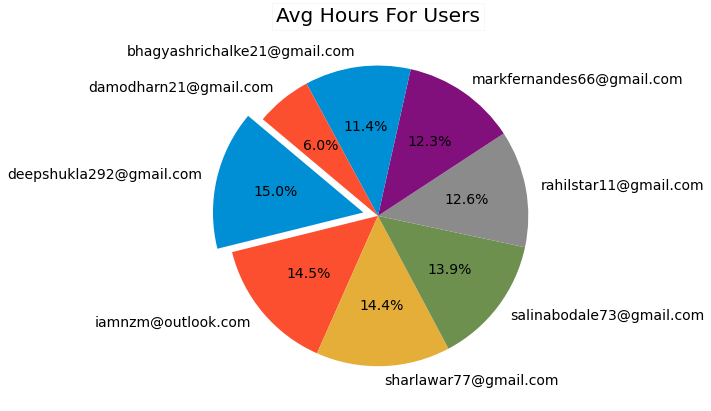

In [23]:
try:
    plt.style.use("fivethirtyeight")
    fig = plt.figure(figsize=(6,12))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    plt.pie(work,labels=username,autopct='%1.1f%%',startangle=140,explode= explode)
    plt.title('Avg Hours For Users',bbox={'facecolor':'1', 'pad':4})
except Exception as e:
    logger.info(e)

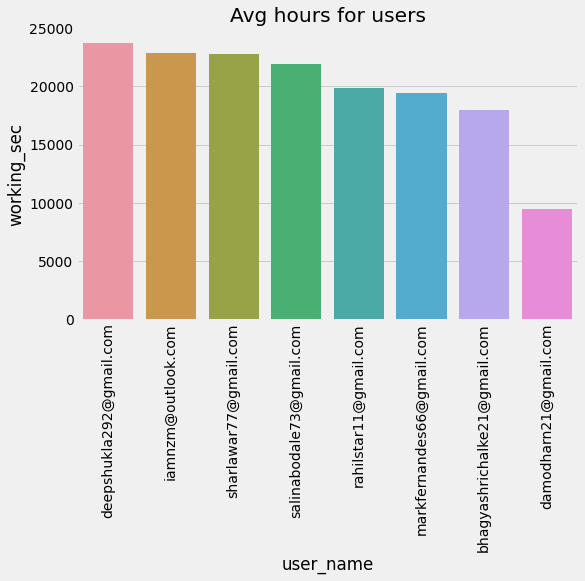

In [28]:
try:
    df = highest_avg_sec
    plt.figure(figsize = (8,5))
    sns.barplot(x = 'user_name',y='working_sec',data = df)
    plt.title("Avg hours for users")
    plt.ylim(0,25000)
    plt.xticks(rotation='vertical')
    plt.show()
except Exception as e:
    logger.info(e)

# Plotting total user count

Text(0.5, 1.0, 'Total User Records')

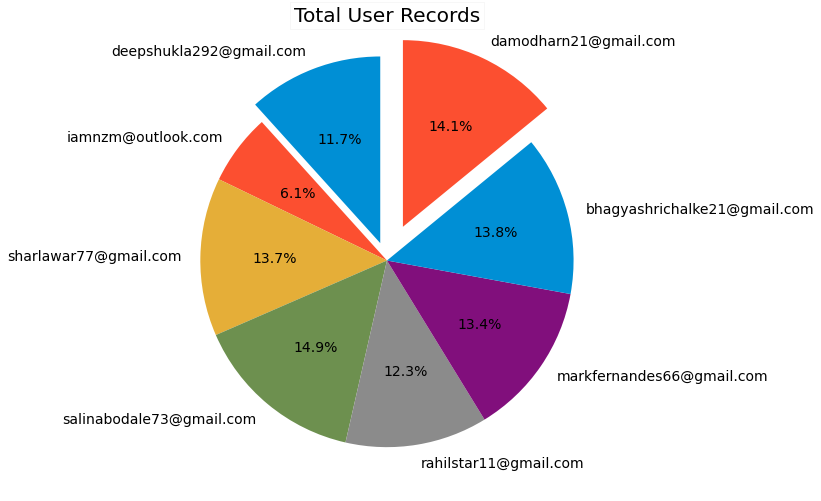

In [36]:
try:
    user_data = user_count["user_name"]
    count_data = user_count["total_count"]

    fig = plt.figure(figsize=(10,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0.2)
    # Plot
    plt.pie(count_data,labels = username,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title('Total User Records',bbox={'facecolor':'1', 'pad':4})
except Exception as e:
    logger.info(e)

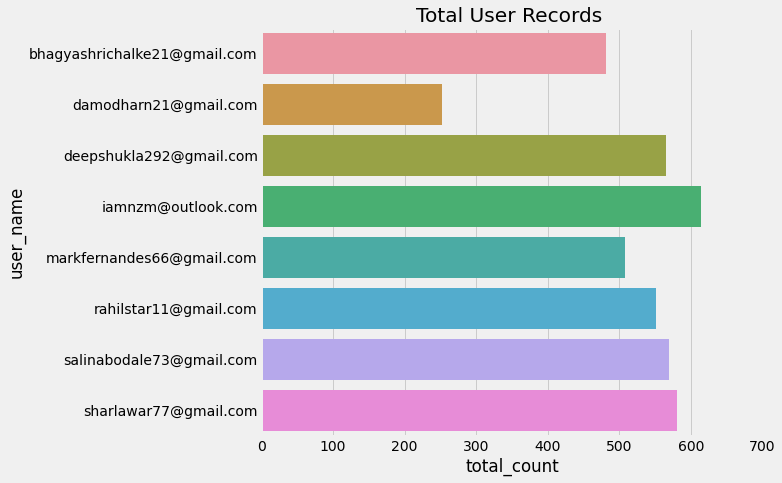

In [30]:
try:
    df = user_count
    plt.figure(figsize = (8,7))
    sns.barplot(x = 'total_count',y='user_name',data = df)
    plt.title('Total User Records')
    plt.xlim(0,700)
    plt.show()
except Exception as e:
    logger.info(e)

pie chart for total user count

## Pie chart and bar chart for idle time

Text(0.5, 1.0, 'Users Idle Time')

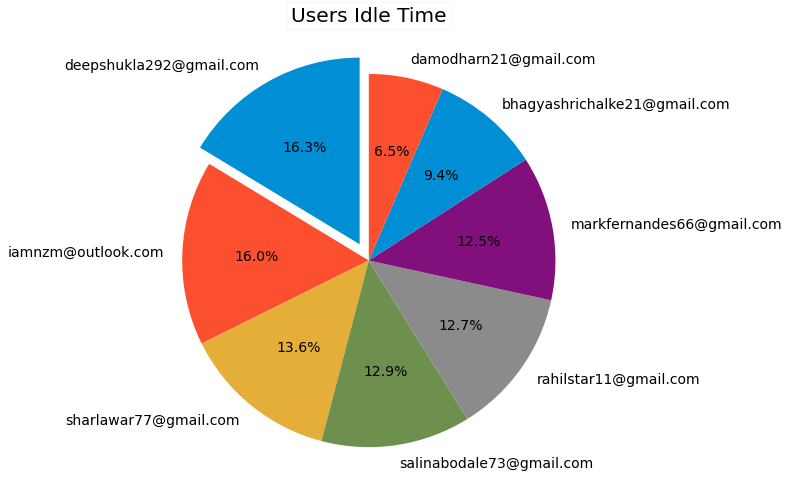

In [37]:
try:
    user_data = highest_idle_time["user_name"]
    count_data = highest_idle_time["idle_sec"]

    fig = plt.figure(figsize=(10,8))
    fig.patch.set_facecolor('w')
    explode = (0.1, 0, 0, 0, 0, 0, 0, 0)
    # Plot
    plt.pie(count_data,labels = username,autopct='%1.1f%%',startangle=90,explode=explode,)
    plt.title('Users Idle Time',bbox={'facecolor':'1', 'pad':4})
except Exception as e:
    logger.info(e)

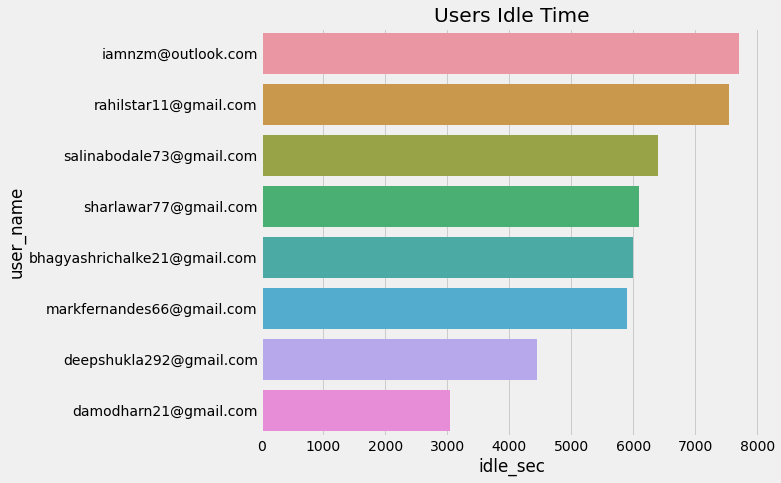

In [38]:
df = highest_idle_time
plt.figure(figsize = (8,7))
sns.barplot(x = 'idle_sec',y='user_name',data = df)
plt.title('Users Idle Time')
plt.show()